In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import Bio.PDB

# TODO: make a proper package for interactive usage, will remove need for hack
try:
    if CORRECT_DIR:
        pass 
except:
    os.chdir("..")
CORRECT_DIR = True

from matplotlib import pyplot as plt
    
from src import featurisers
from src.utils import common as common_utils
from src.factories import pairwise_predictor
from src.utils.cif2pdb import cif2pdb

%matplotlib inline

In [2]:
PDB_FILE = "example_files/AF-A0A1W2PQ64-F1-model_v4.pdb"
CHAIN = "A"

In [3]:
model_structure = featurisers.get_model_structure(PDB_FILE)
model_structure_seq = featurisers.get_model_structure_sequence(model_structure, chain=CHAIN)

In [4]:
def load_model(
    model_dir: str,
    remove_disordered_domain_threshold: float = 0.35,
    min_ss_components: int = 2,
    min_domain_length: int = 30,
):
    config = common_utils.load_json(os.path.join(model_dir, "config.json"))
    config["learner"]["remove_disordered_domain_threshold"] = remove_disordered_domain_threshold
    config["learner"]["post_process_domains"] = True
    config["learner"]["min_ss_components"] = min_ss_components
    config["learner"]["min_domain_length"] = min_domain_length
    learner = pairwise_predictor(config["learner"], output_dir=model_dir)
    learner.eval()
    learner.load_checkpoints()
    return learner

model = load_model("saved_models/secondary_structure_epoch17/version_2")

In [5]:
x = featurisers.inference_time_create_features(
    PDB_FILE,
    chain=CHAIN,
    secondary_structure=True,
    renumber_pdbs=True,
    model_structure=model_structure,
)

In [6]:
A_hat, domain_dict, uncertainty_array = model.predict(x)

## Inspect model outputs

1. Soft domain adjacency matrix
2. Hard domain assignments
3. Confidence/uncertainty of prediction

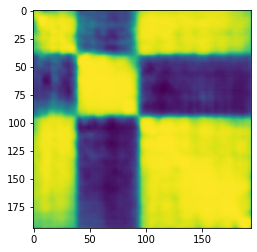

In [7]:
plt.imshow(A_hat[0])

In [8]:
domain_dict[0]

{'domain_1': [6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192],
 'domain_2': [41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55